<center>
    <h1><b>Random Forest: Iris Flower Prediction</b></h1>
    --------------------------
</center>

Use the famous iris flower dtaset from sklearn.datasets to predict flower species using random forest classifier
 - Measure prediction score using default n_estimators(10)
 - Now fine tune the model by changing number of trees in the classifier and tell what best score can be gotten using how many trees.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
import pickle as pk

%matplotlib inline

### Exploration

In [2]:
# loading dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target

In [5]:
df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Building

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['target'], axis = 1), df['target'], test_size = 0.2, random_state = 0)

In [7]:
X_train.shape[0]

120

In [8]:
X_test.shape[0]

30

In [9]:
model1 = RandomForestClassifier(n_estimators = 10, random_state = 1, criterion = 'gini')
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [10]:
model2 = RandomForestClassifier(n_estimators = 10, random_state = 1, criterion = 'entropy')
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [11]:
model3 = RandomForestClassifier(n_estimators = 10, random_state = 1, criterion ='gini')
model3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [12]:
model4 = RandomForestClassifier(n_estimators = 100, random_state = 1, criterion = 'gini')
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Model Evaluation

In [13]:
def print_model(models):
    for model in models:
        print(f'{model}: {(model.score(X_test, y_test) * 100).round(2)}%')

In [14]:
models = [model1, model2, model3, model4]
print_model(models)

RandomForestClassifier(n_estimators=10, random_state=1): 100.0%
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1): 100.0%
RandomForestClassifier(n_estimators=10, random_state=1): 100.0%
RandomForestClassifier(random_state=1): 96.67%


In [15]:
y_predict = model4.predict(X_test)

In [16]:
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

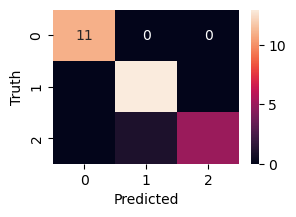

In [17]:
# Visualizing the Confusion Matrix Output
plt.figure(figsize = [3,2])
sb.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

### Saving Model

In [18]:
with open('model_iris_randomForest', 'wb') as file:
    pk.dump(model1, file)